
CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC AUC: 0.8822393822393821


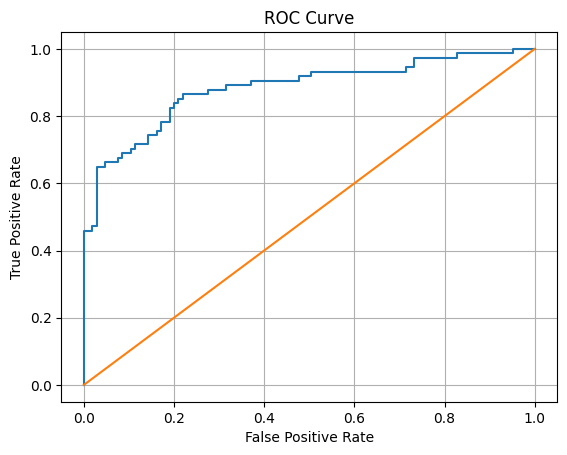


Model has been saved as titanic_logreg_pipeline.pkl

TOP POSITIVE FEATURES
           Feature  Coefficient
5  cat__Sex_female     1.295546
7  cat__Embarked_C     0.169414
4        num__Fare     0.126151
8  cat__Embarked_Q     0.021620
3       num__Parch    -0.092130

TOP NEGATIVE FEATURES
           Feature  Coefficient
9  cat__Embarked_S    -0.252638
2       num__SibSp    -0.347087
1         num__Age    -0.395738
0      num__Pclass    -0.783740
6    cat__Sex_male    -1.357150

streamlit_app.py created successfully


In [3]:
# ============================================================
# TITANIC LOGISTIC REGRESSION + STREAMLIT AUTO DEPLOY (ONE CELL)
# ============================================================

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# ---------------- LOAD DATA ----------------

train_df = pd.read_csv("C:\\Users\\Shreyas Mahale\\Downloads\\Logistic Regression\\Logistic Regression\\Titanic_train.csv")

train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# ---------------- PREPROCESSING ----------------

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, numerical_cols),
    ("cat", cat_pipe, categorical_cols)
])

# ---------------- MODEL ----------------

model = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", model)
])

# ---------------- TRAINING AND TESTING THE MODEL ----------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

# ---------------- EVALUATION ----------------

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]

print("\nCLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))

roc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

# ---------------- SAVING THE MODEL ----------------

joblib.dump(pipeline, "titanic_logreg_pipeline.pkl")

print("\nModel has been saved as titanic_logreg_pipeline.pkl")

# ---------------- FEATURE IMPORTANCE ----------------

feature_names = pipeline.named_steps["prep"].get_feature_names_out()
coeffs = pipeline.named_steps["clf"].coef_[0]

importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coeffs
}).sort_values(by="Coefficient", ascending=False)

print("\nTOP POSITIVE FEATURES")
print(importance.head())

print("\nTOP NEGATIVE FEATURES")
print(importance.tail())

# ---------------- AUTO CREATING THE STREAMLIT APP ----------------

streamlit_app_code = '''
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("titanic_logreg_pipeline.pkl")

st.set_page_config(page_title="Titanic Survival Predictor", layout="centered")

st.title("🚢 Titanic Survival Prediction")
st.write("Professional Logistic Regression Deployment")

pclass = st.selectbox("Passenger Class", [1,2,3])
sex = st.selectbox("Sex", ["male","female"])
age = st.slider("Age",0,100,25)
sibsp = st.number_input("Siblings/Spouses",0,10,0)
parch = st.number_input("Parents/Children",0,10,0)
fare = st.number_input("Fare",0.0,600.0,32.0)
embarked = st.selectbox("Embarked",["S","C","Q"])

df = pd.DataFrame({
    "Pclass":[pclass],
    "Sex":[sex],
    "Age":[age],
    "SibSp":[sibsp],
    "Parch":[parch],
    "Fare":[fare],
    "Embarked":[embarked]
})

if st.button("Predict Survival"):
    pred = model.predict(df)[0]
    prob = model.predict_proba(df)[0][1]

    if pred==1:
        st.success(f"Survives (Probability: {prob:.2f})")
    else:
        st.error(f"Does Not Survive (Probability: {prob:.2f})")

uploaded = st.file_uploader("Batch CSV Prediction (optional)")

if uploaded:
    data = pd.read_csv(uploaded)
    preds = model.predict(data)
    probs = model.predict_proba(data)[:,1]
    data["Prediction"] = preds
    data["Probability"] = probs
    st.write(data)
'''

with open("streamlit_app.py","w", encoding="utf-8") as f:
    f.write(streamlit_app_code)

print("\nstreamlit_app.py created successfully")

In [1]:
'''
Interview Questions:

Q.1) What is the difference between precision and recall?
Ans:- Precision is the ratio of true positive predictions to the total predicted positives, indicating how many of the predicted positive cases were actually positive. 
Recall, on the other hand, is the ratio of true positive predictions to the total actual positives, indicating how many of the actual positive cases were correctly identified by the model.

Q.2) What is cross-validation, and why is it important in binary classification?
Ans:- Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. 
It involves partitioning the data into subsets, training the model on some subsets (training set), and validating it on the remaining subsets (validation set). 
This process is repeated multiple times to ensure that every data point has been used for both training and validation.

'''

'\nInterview Questions:\n\nQ.1) What is the difference between precision and recall?\nAns:- Precision is the ratio of true positive predictions to the total predicted positives, indicating how many of the predicted positive cases were actually positive. \nRecall, on the other hand, is the ratio of true positive predictions to the total actual positives, indicating how many of the actual positive cases were correctly identified by the model.\n\nQ.2) What is cross-validation, and why is it important in binary classification?\nAns:- Cross-validation is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. \nIt involves partitioning the data into subsets, training the model on some subsets (training set), and validating it on the remaining subsets (validation set). \nThis process is repeated multiple times to ensure that every data point has been used for both training and validation.\n\n'